In [90]:
%load_ext autoreload
%autoreload 2
import numpy as np
from scipy.stats import norm
from sampler import *
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Go Out & Sample People

In [91]:
calculus_grades = Population()

sample_size = 40

In [92]:
# What data did we collect?

first_sample = calculus_grades.sample(sample_size).round(2)
print(first_sample)

[54.39 55.22 55.45 60.24 60.31 60.9  61.03 62.06 63.37 65.23 65.5  65.64
 67.42 67.86 68.37 68.38 69.12 70.   70.21 70.29 70.52 73.33 73.52 73.62
 75.86 75.91 77.21 77.34 79.88 80.6  81.29 81.49 81.9  82.58 83.08 83.95
 84.68 87.9  88.27 88.52]


In [93]:
# What is the sample mean of our first sample

first_sample.mean()

72.06099999999999

In [94]:
# Go out and get another sample

second_sample = calculus_grades.sample(sample_size).round(2)

In [95]:
# What is the mean now?

second_sample.mean()

72.16125

In [103]:
# No two samples will be identical because constituent data are not guarenteeed to be the same.

# What is the sampling distribution of the sample mean?

means = [calculus_grades.sample(size = sample_size).mean() for i in range(20_000)]

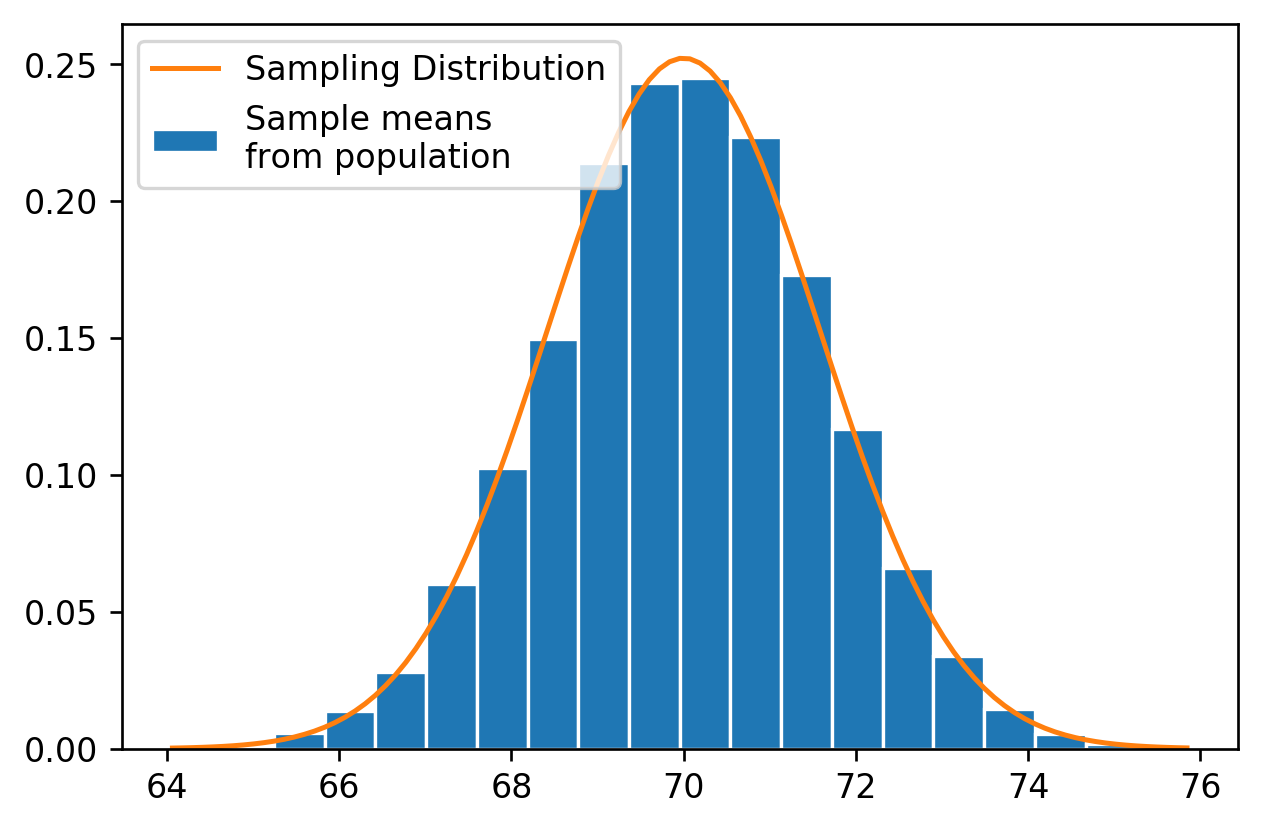

In [104]:
plt.figure(dpi = 120)
plt.hist(means, density = True, label = 'Sample means\nfrom population', edgecolor = 'white', bins = 20);
x = np.linspace(min(means), max(means),101)

sampling_distribution = norm(calculus_grades.pop_mean, calculus_grades.pop_sd/np.sqrt(sample_size))
plt.plot(x, sampling_distribution.pdf(x), label = 'Sampling Distribution')

plt.legend(loc = 'upper left')

# The Bootstrap

In [98]:
# In the bootstrap, we only have one sample

our_sample = calculus_grades.sample(sample_size)

print(our_sample)

[51.71322754 53.24569399 55.2023604  59.0958096  60.20885358 60.82834092
 61.5333922  63.67477768 64.0107046  64.01948075 64.04372814 64.92507888
 65.66920568 65.92539565 65.93369275 68.00976805 68.02235586 69.97738406
 70.8133139  72.66392178 72.77731174 74.35311552 74.5373345  74.58240766
 75.06762739 75.07397685 75.12784067 75.49615494 75.50600973 75.86916722
 76.88763069 77.04005781 77.5199941  79.02278939 79.3686085  79.69262225
 80.41090056 80.92573631 85.64117378 92.67845082]


In [105]:
# Simulate going out and repeatedly sampling by bootstrapping

bs_means = []

for i in range(20_000):
    bs_sample = np.random.choice(our_sample, replace = True, size = our_sample.size)
    
    bs_means.append(bs_sample.mean())

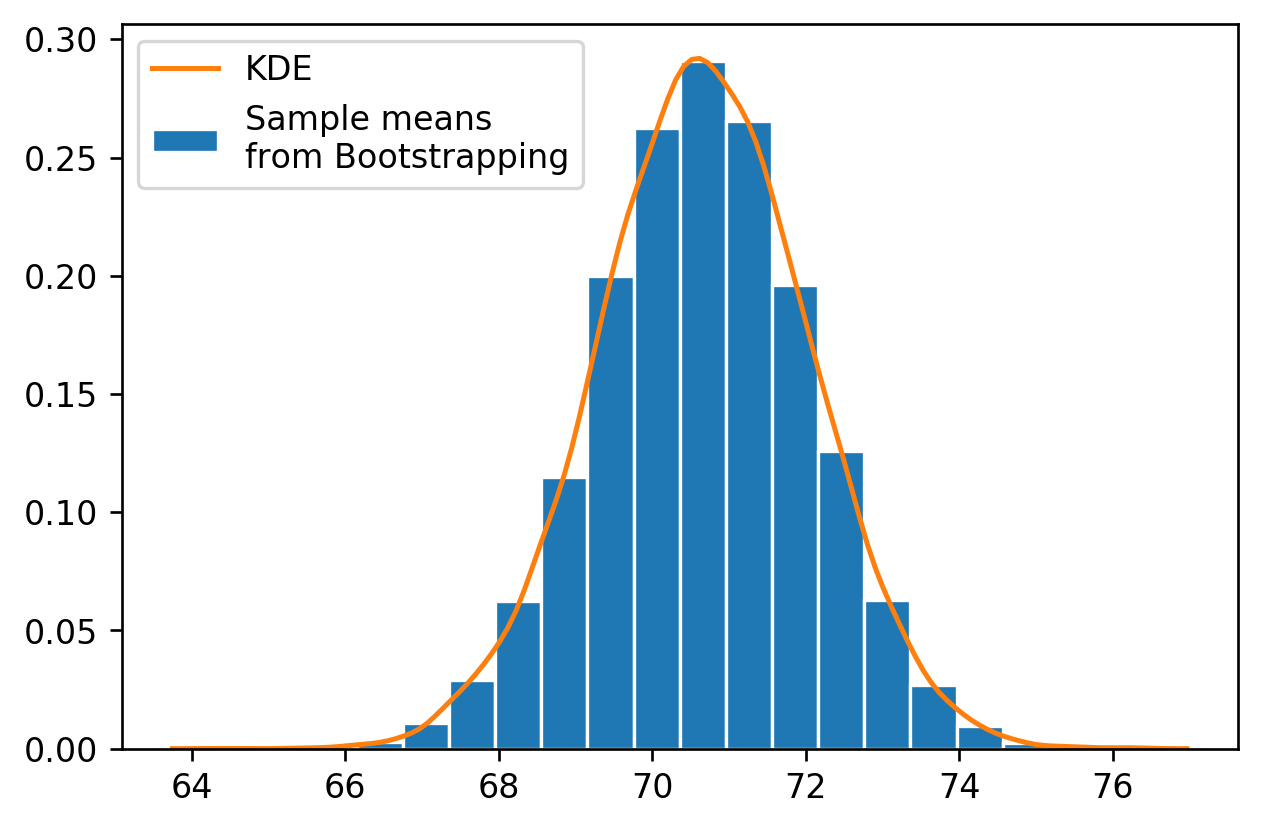

In [106]:
plt.figure(dpi = 120)
plt.hist(bs_means, density = True, label = 'Sample means\nfrom Bootstrapping', edgecolor = 'white', bins = 20);
x = np.linspace(min(bs_means), max(bs_means),101)

sns.kdeplot(bs_means, label = 'KDE')

plt.legend(loc = 'upper left')

In [108]:
np.quantile(bs_means, [0.025, 0.975])

array([67.93636188, 73.34966914])

In [109]:
calculus_grades.pop_mean + np.array([-1, 1])*1.96*calculus_grades.pop_sd/np.sqrt(sample_size)

array([66.90096789, 73.09903211])